## 183. Customers Who Never Order



**Change Log**   

| Date | Description |
| ---------- | ---------- |
| 2022-04-11 | Initialize |



## Summary

Find all customers that have not ordered anything.

#### SQL Schema

```sql
Create table If Not Exists Customers (id int, name varchar(255))
Create table If Not Exists Orders (id int, customerId int)
Truncate table Customers
insert into Customers (id, name) values ('1', 'Joe')
insert into Customers (id, name) values ('2', 'Henry')
insert into Customers (id, name) values ('3', 'Sam')
insert into Customers (id, name) values ('4', 'Max')
Truncate table Orders
insert into Orders (id, customerId) values ('1', '3')
insert into Orders (id, customerId) values ('2', '1')

```

Table: Employee

```
+-------------+---------+
| Column Name | Type    |
+-------------+---------+
| id          | int     |
| name        | varchar |
+-------------+---------+
id is the primary key column for this table.
Each row of this table indicates the ID and name of a customer.
```

Table: Orders

```
+-------------+------+
| Column Name | Type |
+-------------+------+
| id          | int  |
| customerId  | int  |
+-------------+------+
id is the primary key column for this table.
customerId is a foreign key of the ID from the Customers table.
Each row of this table indicates the ID of an order and the ID of the customer who ordered it.
```

## Problem

Write an SQL query to report all customers who never order anything.

Return the result table in **any order**.

The query result format is in the following example.

 

#### Example 1:

**Input:** 
```
Customers table:
+----+-------+
| id | name  |
+----+-------+
| 1  | Joe   |
| 2  | Henry |
| 3  | Sam   |
| 4  | Max   |
+----+-------+
Orders table:
+----+------------+
| id | customerId |
+----+------------+
| 1  | 3          |
| 2  | 1          |
+----+------------+
```
**Output:**
```
+-----------+
| Customers |
+-----------+
| Henry     |
| Max       |
+-----------+
```

<!-- **Explanation**: Joe is the only employee who earns more than his manager. -->

--- 

--- 

## Solution 1 - MSSQL

Another easy one using a `LEFT JOIN` from the `Customers` table to the `Orders` table.  The key is to look for a `Null` in the `Orders` table (i.e., no matching record exists.

#### The Plan:
Select `Customers` records where there are no matching `Orders`


```sql
/* Write your T-SQL query statement below */
SELECT      name AS Customers
FROM        Customers c
            LEFT JOIN Orders o ON o.customerId = c.id
WHERE       o.customerId IS NULL


```

### Result

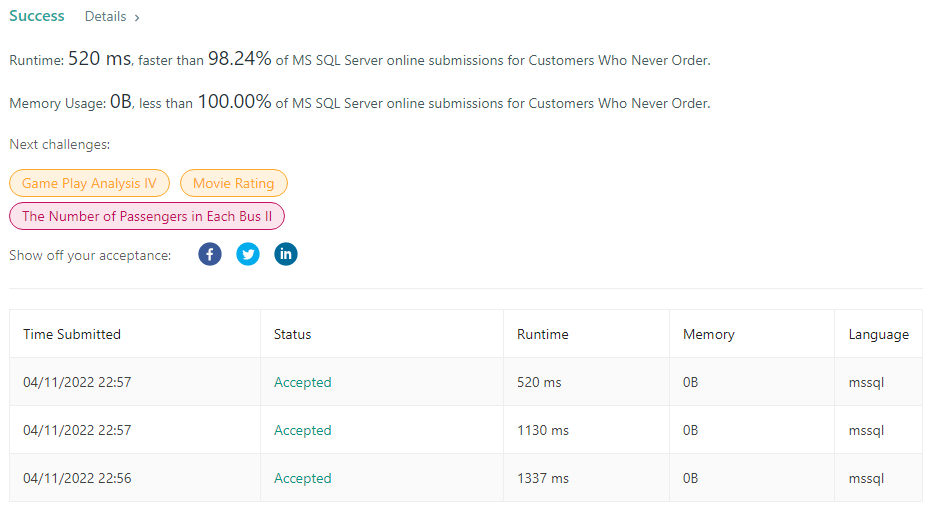



The results are good, but as we noted before server load has a big impact on variation.

--- 

## Solution 2 - MSSQL - Use NOLOCK

Use the NOLOCK table hint.



```sql
/* Write your T-SQL query statement below */
SELECT      name AS Customers
FROM        Customers c (NOLOCK)
            LEFT JOIN Orders o (NOLOCK) ON o.customerId = c.id
WHERE       o.customerId IS NULL
```

### Result

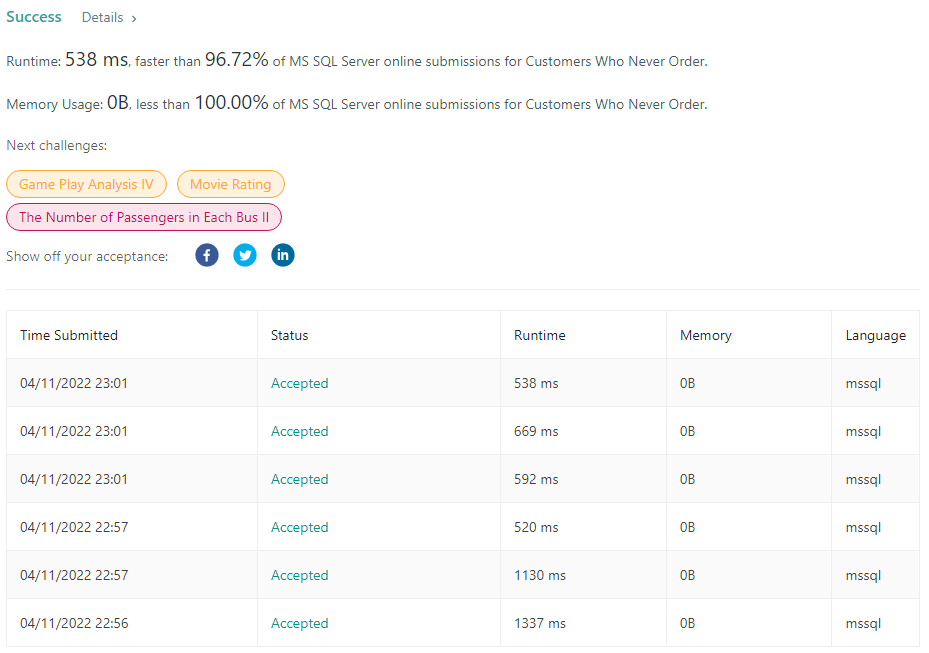



No noticeable difference on a dataset this small

--- 

## Solution 3 - MySQL 

Pretty much the same thing in MySQL. 

```sql
# Write your MySQL query statement below
SELECT      name AS Customers
FROM        Customers c
            LEFT JOIN Orders o ON o.customerId = c.id
WHERE       o.customerId IS NULL
;

```



### Result

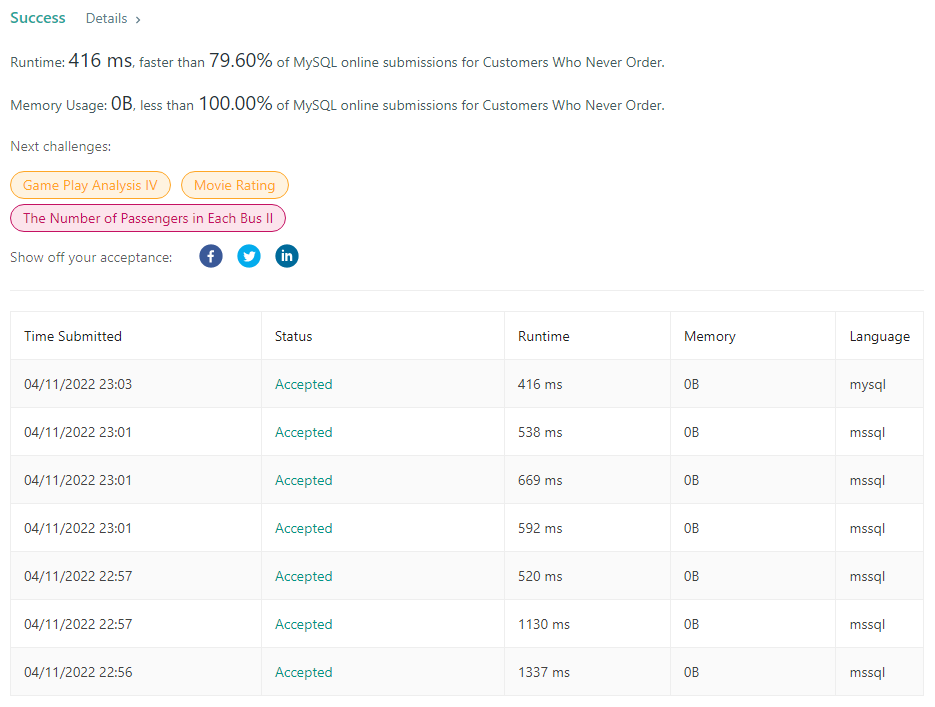




As usual MySQL is kicking butt on MSSQL.

--- 
